<a href="https://colab.research.google.com/github/aniketsharma00411/mba_placement_prediction/blob/main/status_eda_mba_placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: https://www.kaggle.com/benroshan/factors-affecting-campus-placement

# Uploading dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


# Initialization

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Placement_Data_Full_Class.csv', index_col='sl_no').reset_index(drop=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Splitting into training (validation included) and test sets

Early splitting will help ensure that the data used for training and validation has no information which available in the testing/final evaluation dataset.

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,44.0,Central,58.0,Central,Arts,55.0,Comm&Mgmt,Yes,64.25,Mkt&HR,58.54,Not Placed,NaN
1,M,66.0,Central,76.0,Central,Commerce,72.0,Comm&Mgmt,Yes,84.00,Mkt&HR,58.95,Placed,275000.0
2,M,63.0,Central,60.0,Central,Commerce,57.0,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55,Placed,204000.0
3,F,73.0,Others,63.0,Others,Science,66.0,Comm&Mgmt,No,89.00,Mkt&Fin,60.50,Placed,216000.0
4,M,52.0,Others,65.0,Others,Arts,57.0,Others,Yes,75.00,Mkt&Fin,59.81,Not Placed,NaN


# Exploratory Data Analysis (EDA)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          129 non-null    object 
 1   ssc_p           129 non-null    float64
 2   ssc_b           129 non-null    object 
 3   hsc_p           129 non-null    float64
 4   hsc_b           129 non-null    object 
 5   hsc_s           129 non-null    object 
 6   degree_p        129 non-null    float64
 7   degree_t        129 non-null    object 
 8   workex          129 non-null    object 
 9   etest_p         129 non-null    float64
 10  specialisation  129 non-null    object 
 11  mba_p           129 non-null    float64
 12  status          129 non-null    object 
 13  salary          88 non-null     float64
dtypes: float64(6), object(8)
memory usage: 14.2+ KB


In [ ]:
numerical = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
categorical = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

classification_target = ['status']
regression_target = ['salary']

## Target

In [ ]:
df_train[classification_target].head()

,status
0,Not Placed
1,Placed
2,Placed
3,Placed
4,Not Placed


In [ ]:
y = pd.get_dummies(df_train[classification_target])['status_Placed']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: status_Placed, dtype: uint8

In [ ]:
y.value_counts()

1    88
0    41
Name: status_Placed, dtype: int64

There is a class imbalance in the target as there are more `Placed` students than `Not Placed`.

## Numerical Features

In [ ]:
df_numerical = df_train[numerical]

df_numerical.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
0,44.0,58.0,55.0,64.25,58.54
1,66.0,76.0,72.0,84.00,58.95
2,63.0,60.0,57.0,78.00,54.55
3,73.0,63.0,66.0,89.00,60.50
4,52.0,65.0,57.0,75.00,59.81


In [ ]:
df_numerical.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,129.000000,129.000000,129.000000,129.000000,129.000000
mean,66.949690,66.314186,66.337984,72.284651,62.661550
std,10.614273,10.618781,7.637630,13.179609,5.908486
min,41.000000,37.000000,50.800000,50.000000,52.380000
25%,61.000000,61.000000,60.900000,61.280000,58.300000
50%,66.500000,64.890000,66.000000,70.000000,62.000000
75%,74.200000,72.800000,72.000000,84.000000,66.940000
max,87.000000,97.000000,91.000000,98.000000,77.890000


### Missing Values

The training data does not have any missing values but the testing data can. So, we need to decide how to fill missing values for each feature.

The methodology used for numerical features is:
- Fill with mean if the feature has Gaussian distribution
- Fill with meadian otherwise

To find if the feature is Gaussian or not we will plot histograms of each feature.

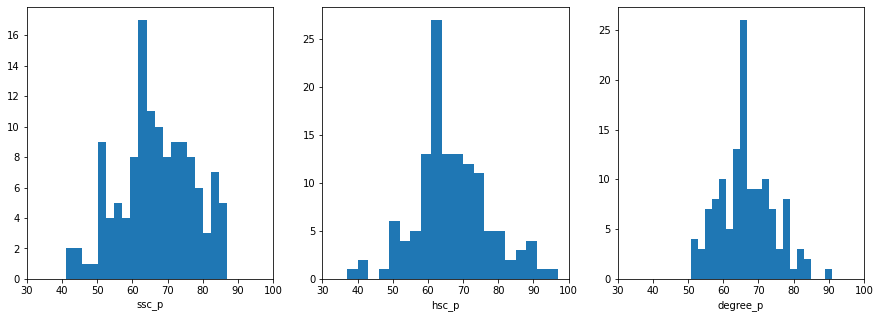

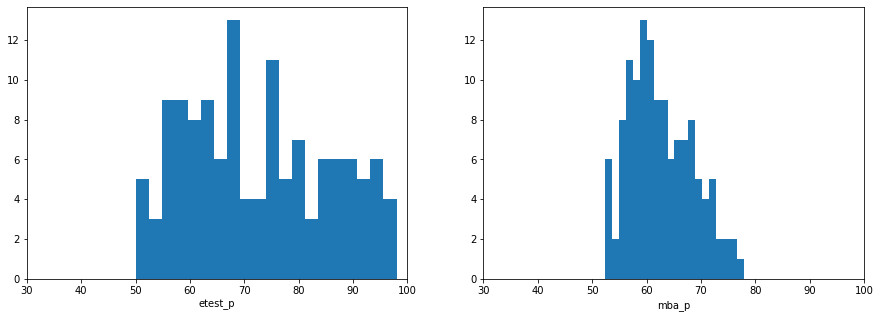

In [ ]:
_, ax1 = plt.subplots(1,3, figsize=(15,5))
for i, c in enumerate(numerical[:3]):
    ax1[i].hist(df_numerical[c], bins = 20)
    ax1[i].set_xlabel(c)
    ax1[i].set_xlim(30, 100)

_, ax2 = plt.subplots(1,2, figsize=(15,5))
for i, c in enumerate(numerical[3:]):
    ax2[i].hist(df_numerical[c], bins = 20)
    ax2[i].set_xlabel(c)
    ax2[i].set_xlim(30, 100)

plt.show()

Distribution of all the features is close to Gaussian so we will fill missing values with mean.

### Feature Redundance

Next, we will look at correlation between features to find if there are any redundant features.

We will try to find linear correlation between features using Pearson's correlation coefficient and non-linear correlation using Spearman's correlation.

For both we will plot a correlation matrix to make the result readable.

Source: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

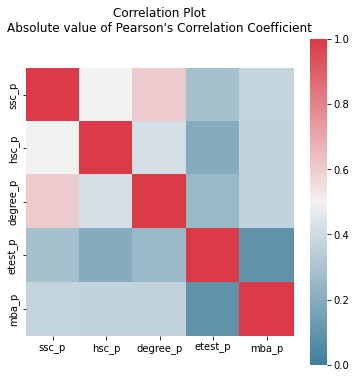

In [ ]:
pearson_corr = df_numerical.corr(method='pearson').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

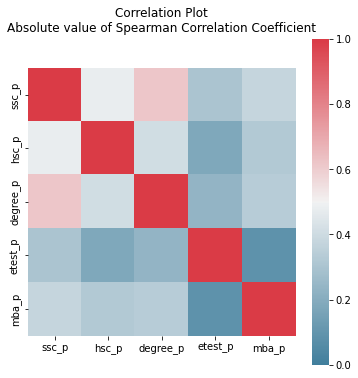

In [ ]:
spearman_corr = df_numerical.corr(method='spearman').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Spearman Correlation Coefficient\n\n")
sns.heatmap(spearman_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

From this we can conclude that (ssc_p, hsc_p) and (ssc_p, degree_p) are somewhat correlated with each both. But the correlation is not too strong to remove any feature.

### Feature Selection

Now, we will try to find feature relevance with the target.

For this we will use ANOVA F-value to find linear relationship and Kendall's $\tau$ coefficient for non-linear relationship.

Source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
anova_f_values = f_classif(df_numerical, y)[0]

linear_corr = pd.Series(anova_f_values, index=df_numerical.columns)
linear_corr

ssc_p       68.819713
hsc_p       31.405439
degree_p    46.967705
etest_p      3.166294
mba_p        0.007721
dtype: float64

The more the ANOVA F-value the more important the feature is in predicting the result.

In [ ]:
non_linear_corr = df_numerical.corrwith(y, method='kendall')
non_linear_corr

ssc_p       0.480178
hsc_p       0.345941
degree_p    0.449308
etest_p     0.115690
mba_p      -0.019060
dtype: float64

The closer the value to 1 the more important the feature is in predicting the result.

Therefore, we can conclude `ssc_p` is the most important numerical feature and `mba_p` is the least important numerical feature.

If and which features to remove we will decide by training some simple linear models after removing the features one by one based on their correlation values and evaluating their scores.

## Categorical Features

In [ ]:
df_categorical = df_train[categorical]

df_categorical.head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
0,M,Central,Central,Arts,Comm&Mgmt,Yes,Mkt&HR
1,M,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&HR
2,M,Central,Central,Commerce,Comm&Mgmt,Yes,Mkt&Fin
3,F,Others,Others,Science,Comm&Mgmt,No,Mkt&Fin
4,M,Others,Others,Arts,Others,Yes,Mkt&Fin


In [ ]:
df_categorical.describe()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
count,129,129,129,129,129,129,129
unique,2,2,2,3,3,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin
freq,85,70,80,71,90,85,68


In [ ]:
df_categorical_encoded = pd.get_dummies(df_categorical, drop_first=True)
df_categorical_encoded.head()

,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,0,0,0,0,0,0,1,1
1,1,0,0,1,0,0,0,1,1
2,1,0,0,1,0,0,0,1,0
3,0,1,1,0,1,0,0,0,0
4,1,1,1,0,0,1,0,1,0


### Missing Values

The training data does not have any missing values but the testing data can. So, we will fill the missing values with the most frequent value in the feature.

### Feature Redundance

Now, we will find redundant categorical features.

We will try to find linear correlation between features using Pearson's correlation coefficient and non-linear correlation using Spearman's correlation.

For both we will plot a correlation matrix to make the result readable.

Source: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

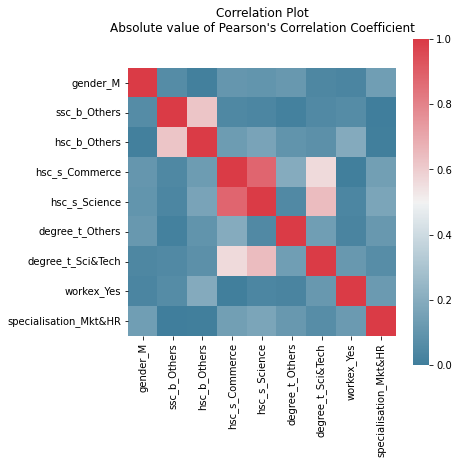

In [ ]:
pearson_corr = df_categorical_encoded.corr(method='pearson').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

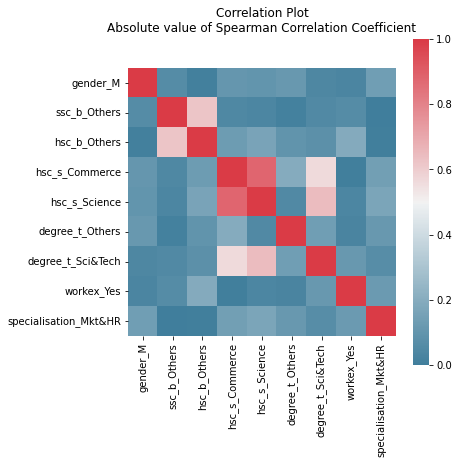

In [ ]:
spearman_corr = df_categorical_encoded.corr(method='spearman').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Spearman Correlation Coefficient\n\n")
sns.heatmap(spearman_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

Again the correlation is not too strong between any pair of features to remove them.

Therefore, we can conclude that there are no redundant features.

### Feature Selection

Now, we will try to find feature relevance with the target.

For this we will use Chi-Squared test and Mutual Information.

Source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
chi_square = chi2(df_categorical_encoded, y)[0]

chi_square = pd.Series(chi_square, index=df_categorical_encoded.columns)
chi_square

gender_M                 0.055957
ssc_b_Others             0.239938
hsc_b_Others             0.018972
hsc_s_Commerce           0.826020
hsc_s_Science            0.410111
degree_t_Others          5.074596
degree_t_Sci&Tech        0.004192
workex_Yes               5.113643
specialisation_Mkt&HR    6.986296
dtype: float64

The more the Chi-squared value the more important the feature is in predicting the result.

In [ ]:
mutual_info = mutual_info_classif(df_categorical_encoded, y, discrete_features=True, random_state=42)

mutual_info = pd.Series(mutual_info, index=df_categorical_encoded.columns)
mutual_info

gender_M                 0.000632
ssc_b_Others             0.001720
hsc_b_Others             0.000194
hsc_s_Commerce           0.007104
hsc_s_Science            0.002577
degree_t_Others          0.019037
degree_t_Sci&Tech        0.000022
workex_Yes               0.032316
specialisation_Mkt&HR    0.052384
dtype: float64

The more the Mutual Information value the more important the feature is in predicting the result.

Therefore, we can conclude `workex_Yes` is the most important categorical feature and `hsc_b_Others` is the least important categorical feature.

If and which features to remove we will decide by training some simple linear models after removing the features one by one based on their correlation values and evaluating their scores.